# Cost Function

A cost function is an important parameter that determines how well a machine learning model performs for a given
dataset. It calculates the difference between the expected value and predicted value and represents it as a single real
number.

Gradient Descent is an optimization algorithm which is used for optimizing the cost function or error in the
model." It enables the models to take the gradient or direction to reduce the errors by reaching to least possible error.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data=pd.read_csv('salary.csv')
print(data)

    salary  experience
0      1.7         1.2
1      2.4         1.5
2      2.3         1.9
3      3.1         2.2
4      3.7         2.4
5      4.2         2.5
6      4.4         2.8
7      6.1         3.1
8      5.4         3.3
9      5.7         3.7
10     6.4         4.2
11     6.2         4.4


1. Create the following data set for Experience and Salary in CSV. Applying SLR, explore the relationship between salary and experience with exerience in x-axis and salary in y axis.

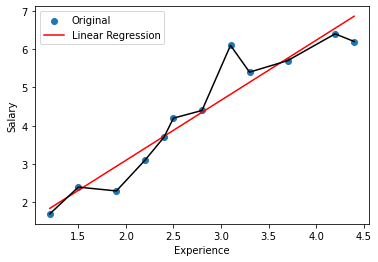

In [10]:
X=data['experience'].values.reshape(-1, 1)
Y=data['salary'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, Y)
y_pred=model.predict(X)
plt.scatter(X,Y,label='Original')
plt.plot(X,y_pred,'r',label='Linear Regression')
plt.plot(X,Y,'black')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

1. a. Check for various values of beta (slope) = 0.1, 1.5, and 0.8 with a fixed value of intercept i.e b=1.1. Plot the graph between beta and mean squared error(MSE) for each case.

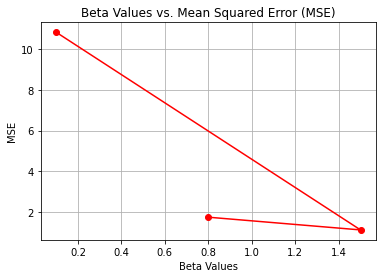

In [3]:
#q1 a
b = 1.1

betas = [0.1, 1.5, 0.8]
mse_values = []

for beta in betas:
    y_pred = beta*X + b
    mse = mean_squared_error(Y, y_pred)
    mse_values.append(mse)

plt.plot(betas, mse_values, marker='o',color='red')
plt.title('Beta Values vs. Mean Squared Error (MSE)')
plt.xlabel('Beta Values')
plt.ylabel('MSE')
plt.grid(True)

plt.show()

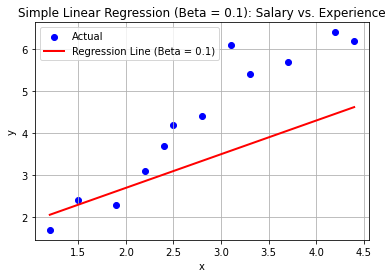

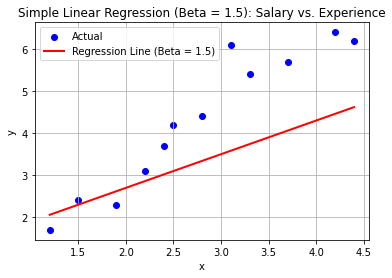

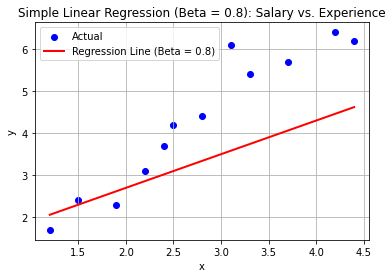

[10.81115, 1.1404166666666662, 1.762599999999999]


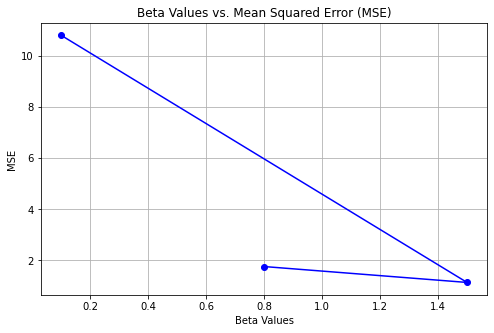

In [4]:
from sklearn.metrics import mean_squared_error

b0=1.1
beta=0
beta_val=[0.1,1.5,0.8]
mse1=[]
plots = []

for beta in beta_val:
    y_pred1=b0 +beta*X
    mse=mean_squared_error(Y, y_pred1)
    mse1.append(mse)
    
    plt.scatter(X, Y, color='blue', label='Actual')
    plt.plot(X, y_pred, color='red', linewidth=2, label=f'Regression Line (Beta = {beta})')
    plt.title(f'Simple Linear Regression (Beta = {beta}): Salary vs. Experience') 
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()
    plots.append(plt)

print(mse1)

# Display individual plots for each beta value
for plt_obj in plots:
    plt_obj.show()

# Plot beta values vs. MSE
plt.figure(figsize=(8, 5))
plt.plot(betas, mse_values, marker='o', linestyle='-', color='b')
plt.title('Beta Values vs. Mean Squared Error (MSE)')
plt.xlabel('Beta Values')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

1. b. Try with beta between 0 to 1.5 with an increment of 0.01 keeping b (intercept) as constant and Plot the graph between beta and mean squared error(MSE).

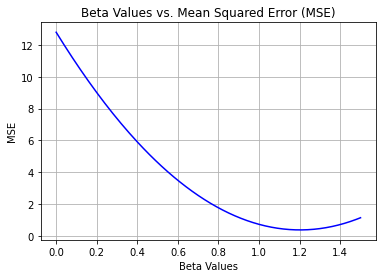

In [5]:
b = 1.1
betas = np.arange(0, 1.51, 0.01)
mse_values = []

for beta in betas:
    y_pred = b + beta * X
    mse = mean_squared_error(Y, y_pred)
    mse_values.append(mse)

plt.plot(betas, mse_values, color='b')
plt.title('Beta Values vs. Mean Squared Error (MSE)')
plt.xlabel('Beta Values')
plt.ylabel('MSE')
plt.grid(True)

# Display the plot
plt.show()

1. c. Try with different values of intercept for slope beta between 0 to 1.5 with an increment of 0.01. Plot the graph between beta and mean squared error(MSE)

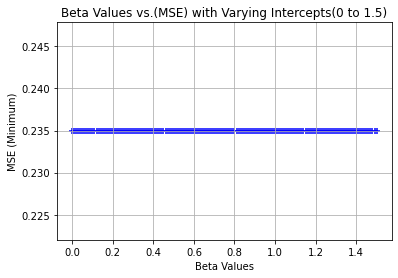

In [28]:
betas = np.arange(0, 1.51, 0.01)
mse_values = []
intercepts = np.arange(0, 1.51, 0.01)

for beta in betas:
    mse_values_for_intercepts = []

    for intercept in intercepts:
        model = LinearRegression()
        model.fit(X, y)
        model.intercept_ = intercept  # Set the intercept value
        y_pred = model.predict(X)
        mse = mean_squared_error(y, y_pred)
        mse_values_for_intercepts.append(mse)

    # Take the minimum MSE value for this beta value
    min_mse = min(mse_values_for_intercepts)

    mse_values.append(min_mse)

plt.scatter(betas, mse_values, marker='+', color='b')
plt.title('Beta Values vs.(MSE) with Varying Intercepts(0 to 1.5)')
plt.xlabel('Beta Values')
plt.ylabel('MSE (Minimum)')
plt.grid(True)
plt.show()

1. d. Use the scikit learn and compare the results of MSE.

MSE using scikit-learn: 0.23366710810280558


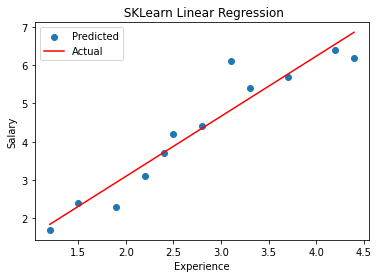

In [17]:
model = LinearRegression()
model.fit(X,Y)
y_pred = model.predict(x)
 
mse = mean_squared_error(Y, y_pred)
print("MSE using scikit-learn:", mse)

plt.scatter(X, Y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title(' SKLearn Linear Regression')
plt.legend(['Predicted', 'Actual'])
plt.show()

2. Apply Stochastic Gradient Descent for the afore-mentioned dataset, and arrive at different values of B0, B1 and error for 60 iterations of 5 epochs.

Cost is : 4.299166666666666
Cost is : 0.04446691220372513
Cost is : 0.04438243978104553
Cost is : 0.04430368073950863
Cost is : 0.04423024864623025
Cost is : 0.04416178320762135
Cost is : 0.0440979484989178
Cost is : 0.044038431315970364
Cost is : 0.043982939638512464
Cost is : 0.04393120119736658
Cost is : 4.299166666666666
Cost is : 0.26280410316446684
Cost is : 0.055717789320499124
Cost is : 0.045076944529813576
Cost is : 0.044514162264116655
Cost is : 0.044468627919899695
Cost is : 0.0444498600742658
Cost is : 0.04443269339168461
Cost is : 0.04441583370427708
Cost is : 0.04439921149989454
Cost is : 4.299166666666666
Cost is : 0.04869891141410948
Cost is : 0.044488755874377214
Cost is : 0.044449726348901944
Cost is : 0.04441575544965452
Cost is : 0.0443827252567782
Cost is : 0.04435060592186757
Cost is : 0.044319372322893326
Cost is : 0.044289000034434756
Cost is : 0.04425946530464035
Cost is : 4.299166666666666
Cost is : 0.04451344205578746
Cost is : 0.04444966205616656
Cost is : 0

TypeError: absolute() takes from 1 to 2 positional arguments but 0 were given

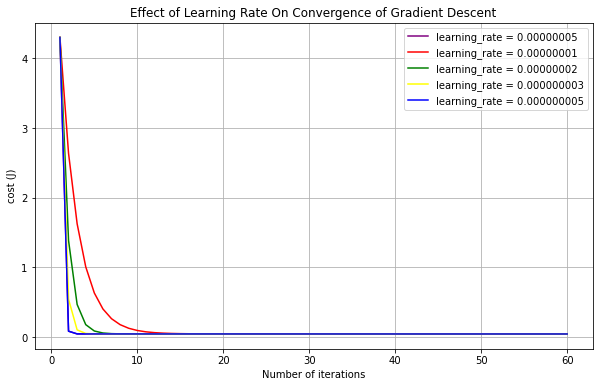

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
d=pd.read_csv("salary.csv")
dt = d.values
y = dt[:, -1].reshape(dt.shape[0],1)
x = dt[:, :-1]

a=x.shape[0]
ones=np.ones((a,1))
x= np.concatenate((ones,x),axis=1)

def model(x, y, learning_rate, iteration):
    m = y.size
    theta = np.zeros((x.shape[1], 1))
    cost_list = []
    for i in range(iteration):
        y_pred = np.dot(x, theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - y))
        d_theta = (1/m)*np.dot(x.T, y_pred - y)
        theta = theta - learning_rate*d_theta
        cost_list.append(cost)
        if(i%(iteration/10) == 0):
            print("Cost is :", cost)
    return theta, cost_list

iteration = 60;

learning_rate = 0.05;
theta_1, cost_history_1 = model(x, y, learning_rate, iteration)

learning_rate = 0.01;
theta_2, cost_history_2 = model(x, y, learning_rate, iteration)

learning_rate = 0.02;
theta_3, cost_history_3 = model(x, y, learning_rate, iteration)

learning_rate = 0.03;
theta_4, cost_history_4 = model(x, y, learning_rate, iteration)

learning_rate = 0.05;
theta_5, cost_history_5 = model(x, y, learning_rate, iteration)

plt.plot(range(1, iteration +1), cost_history_1, color ='purple', label = 'learning_rate = 0.00000005')
plt.plot(range(1, iteration +1), cost_history_2, color ='red', label = 'learning_rate = 0.00000001')
plt.plot(range(1, iteration +1), cost_history_3, color ='green', label = 'learning_rate = 0.00000002')
plt.plot(range(1, iteration +1), cost_history_4, color ='yellow', label = 'learning_rate = 0.000000003')
plt.plot(range(1, iteration +1), cost_history_5, color ='blue', label = 'learning_rate = 0.000000005')
 
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend()

error = (1/x.shape[0])*np.sum(np.abs())
print("Test error is :", error*100, "%")
print("Test Accuracy is :", (1- error)*100, "%")